In [2]:
from IPython.display import Image, clear_output
!pip install roboflow
clear_output()

In [3]:
#downloading dataset
from roboflow import Roboflow
rf = Roboflow(api_key="rk0O6etvu5xsNna4hJMK", model_format="yolov8")
dataset = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e").version("11").download(location="/content/my-datasets")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/my-datasets in yolov8:: 100%|██████████| 20262/20262 [00:03<00:00, 6431.86it/s]


In [4]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO("yolov8s.pt")

# Start training|
results = model.train(
    data="/content/my-datasets/data.yaml",  # path to your Roboflow dataset
    epochs=25,
    imgsz=896,
    batch=16,
    workers=2,

    # Augmentations
    hsv_h=0.015,
    hsv_s=0.6,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    mosaic=0.75,
    mixup=0.15,
    copy_paste=0.1,

    # Colab settings
    device=0,
    exist_ok=True,
    pretrained=True,
    amp=True,
    patience=5,

    # Save options
    save_period=5,

    # Learning
    lr0=0.001,
    lrf=0.01,
    optimizer="AdamW",
    cos_lr=True,

    # Output
    name="colab_train_v1",
    verbose=True
)

# Run validation
_ = model.val()

100%|██████████| 21.5M/21.5M [00:00<00:00, 288MB/s]


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/my-datasets/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=896, save=True, save_period=5, cache=False, device=0, workers=2, project=None, name=colab_train_v1, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.2±4.9 MB/s, size: 24.9 KB)


train: Scanning /content/my-datasets/train/labels... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:05<00:00, 1234.89it/s]

train: New cache created: /content/my-datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.2±5.4 MB/s, size: 20.8 KB)


val: Scanning /content/my-datasets/valid/labels... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:02<00:00, 736.85it/s]

val: New cache created: /content/my-datasets/valid/labels.cache


Plotting labels to runs/detect/colab_train_v1/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 896 train, 896 val
Using 2 dataloader workers
Logging results to runs/detect/colab_train_v1
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.64G      1.359      1.123      1.361          1        896: 100%|██████████| 442/442 [04:31<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:30<00:00,  2.12it/s]

                   all       2048       2195      0.915       0.83       0.91      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.75G      1.315     0.8266      1.356          8        896: 100%|██████████| 442/442 [04:39<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.56it/s]

                   all       2048       2195       0.92      0.857      0.896      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.73G      1.285      0.799      1.342          1        896: 100%|██████████| 442/442 [04:50<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:35<00:00,  1.79it/s]

                   all       2048       2195       0.95      0.897       0.94      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.73G      1.279     0.7625      1.342          1        896: 100%|██████████| 442/442 [04:38<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:29<00:00,  2.14it/s]

                   all       2048       2195      0.953      0.879      0.931       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.7G      1.243     0.7267      1.313          2        896: 100%|██████████| 442/442 [04:26<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.35it/s]

                   all       2048       2195      0.958      0.911      0.942      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.72G       1.21     0.6838      1.293          2        896: 100%|██████████| 442/442 [04:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.44it/s]

                   all       2048       2195      0.975      0.917      0.957      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.7G        1.2      0.659      1.283          3        896: 100%|██████████| 442/442 [04:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.55it/s]

                   all       2048       2195       0.95      0.925      0.949       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.72G      1.189     0.6429      1.279          3        896: 100%|██████████| 442/442 [04:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.37it/s]

                   all       2048       2195      0.969      0.926      0.959      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.7G      1.172      0.619      1.269          4        896: 100%|██████████| 442/442 [04:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.34it/s]

                   all       2048       2195      0.961      0.929      0.959       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.73G      1.155     0.5964      1.247          1        896: 100%|██████████| 442/442 [04:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.41it/s]

                   all       2048       2195      0.976      0.921      0.963      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.71G      1.155     0.5835      1.249          4        896: 100%|██████████| 442/442 [04:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.37it/s]

                   all       2048       2195       0.97      0.933      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.72G      1.138     0.5726      1.237          1        896: 100%|██████████| 442/442 [04:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.36it/s]

                   all       2048       2195      0.975       0.93      0.965      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.7G      1.126     0.5495      1.235          1        896: 100%|██████████| 442/442 [04:17<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.43it/s]

                   all       2048       2195      0.979      0.936      0.971      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.72G      1.114     0.5412      1.221          2        896: 100%|██████████| 442/442 [04:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.42it/s]

                   all       2048       2195      0.981      0.937      0.967      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.7G      1.108     0.5324      1.214          4        896: 100%|██████████| 442/442 [04:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.40it/s]

                   all       2048       2195      0.982       0.94      0.972       0.67


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.72G      1.044     0.4483      1.222          1        896: 100%|██████████| 442/442 [03:49<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:24<00:00,  2.60it/s]

                   all       2048       2195       0.98      0.939      0.972      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.7G       1.03     0.4335      1.217          1        896: 100%|██████████| 442/442 [03:53<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.43it/s]

                   all       2048       2195      0.988      0.942      0.973       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.72G      1.014     0.4188      1.196          1        896: 100%|██████████| 442/442 [03:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.52it/s]

                   all       2048       2195      0.989      0.945      0.975      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.7G      1.007     0.4077      1.187          1        896: 100%|██████████| 442/442 [03:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.46it/s]

                   all       2048       2195      0.982      0.953      0.977      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.72G     0.9901     0.3919      1.174          1        896: 100%|██████████| 442/442 [03:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.43it/s]

                   all       2048       2195      0.987      0.948      0.978      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.7G     0.9827      0.388      1.184          1        896: 100%|██████████| 442/442 [03:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.52it/s]

                   all       2048       2195      0.989      0.943      0.977      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.72G     0.9749     0.3804      1.176          1        896: 100%|██████████| 442/442 [03:56<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.51it/s]

                   all       2048       2195       0.99      0.944      0.978      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.7G     0.9668     0.3713      1.166          1        896: 100%|██████████| 442/442 [03:52<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.53it/s]

                   all       2048       2195      0.991      0.946      0.979      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.73G     0.9609     0.3669      1.164          1        896: 100%|██████████| 442/442 [03:54<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.47it/s]

                   all       2048       2195      0.988      0.946      0.979      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.7G     0.9618     0.3659      1.165          1        896: 100%|██████████| 442/442 [03:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.52it/s]

                   all       2048       2195       0.99      0.946      0.978      0.703



25 epochs completed in 1.957 hours.
Optimizer stripped from runs/detect/colab_train_v1/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/colab_train_v1/weights/best.pt, 22.5MB

Validating runs/detect/colab_train_v1/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:27<00:00,  2.32it/s]


                   all       2048       2195      0.986       0.95      0.979      0.704
Speed: 0.3ms preprocess, 6.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/colab_train_v1
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1053.4±301.8 MB/s, size: 19.8 KB)


val: Scanning /content/my-datasets/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:34<00:00,  3.74it/s]


                   all       2048       2195      0.986      0.951      0.979      0.704
Speed: 0.4ms preprocess, 11.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/colab_train_v1


In [7]:
# Load trained model
model = YOLO("runs/detect/colab_train_v1/weights/best.pt")

# Evaluation on the test set
metrics = model.val(data="/content/my-datasets/data.yaml", split='test')

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.7±3.6 MB/s, size: 21.4 KB)


val: Scanning /content/my-datasets/test/labels... 1020 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1020/1020 [00:00<00:00, 1168.77it/s]


val: New cache created: /content/my-datasets/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.05it/s]


                   all       1020       1085      0.989      0.952      0.979      0.709
Speed: 0.8ms preprocess, 11.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [8]:
!zip -r /content/results.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/P_curve.png (deflated 23%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 35%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 37%)
  adding: content/runs/detect/val/R_curve.png (deflated 16%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/F1_curve.png (deflated 16%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/PR_curve.png (deflated 25%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 7%)



0: 608x896 3 License_Plates, 45.1ms
Speed: 5.4ms preprocess, 45.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 896)


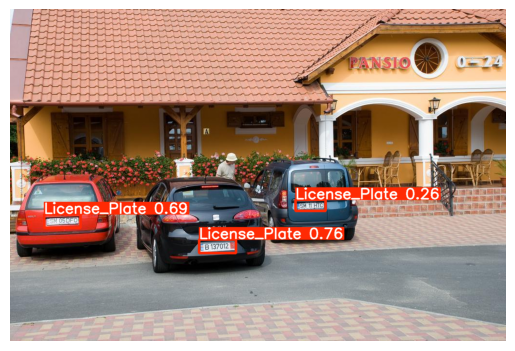

In [9]:
#visualise model performance on test image
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("/content/my-datasets/test/images/0026c246d5c33bea_jpg.rf.e9b4d443d16831c5edd576804bb54beb.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model(img)
results[0].plot()
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()